## Name: Ziad Wael Abdl Hamed       ID:20200211
## Name: Mazen Mohamed Kamel        ID:20200411

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
df=pd.read_csv('data_banknote_authentication.csv') #read the data
df.drop(['curtosis','entropy'],axis=1,inplace=True) #drop the columns curtosis and entropy from the dataframe 
df=df.sample(frac=1)    #shuffle the data
df

,variance,skewness,class
1092,-1.5572,-9.880800,1
31,1.4884,3.627400,0
193,4.8272,3.068700,0
103,3.3397,-4.614500,0
232,2.2596,-0.033118,0
...,...,...,...
234,2.7296,2.870100,0
722,4.8451,8.111600,0
541,3.6667,4.302000,0
335,3.4667,-4.072400,0


In [126]:
X=df[['variance','skewness']] #select the columns variance and skewness 
y=df['class'] #select the column class

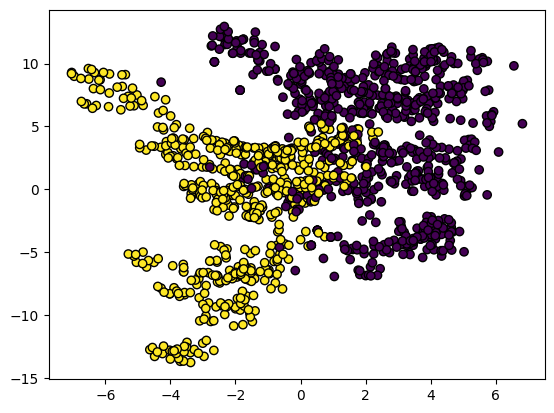

In [127]:
plt.scatter(X['variance'],X['skewness'],c=y,edgecolors='black') #plot the data before applying standardization 

In [128]:
mean = X.mean() #calculate the mean of the data
std = X.std() #calculate the standard deviation of the data
standardized_features = (X - mean) / std #standardize the data 

In [129]:
df_standardized = pd.DataFrame(standardized_features, columns=['variance', 'skewness']) #create a new dataframe with the standardized data
X=df_standardized[['variance','skewness']] #select the columns variance and skewness 
y=df['class'] #select the column class

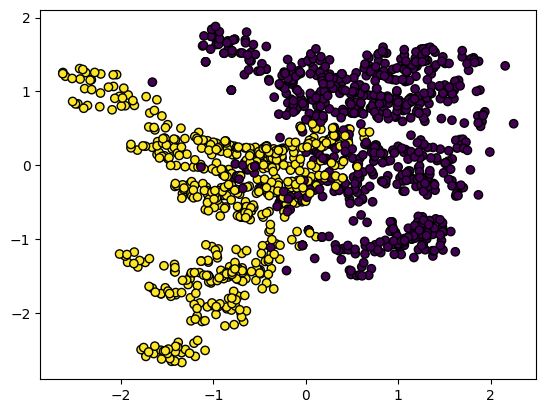

In [130]:
plt.scatter(X['variance'],X['skewness'],c=y,edgecolors='black') #plot the data after applying standardization

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split the data into training and testing data 

In [132]:
w = np.random.rand(2) #initialize the weights with random values
b = np.random.rand(1) #initialize the bias with a random value

## Perceptron Algorithm

In [133]:
total = len(X_train) #calculate the total number of training data
lr=0.001 #set the learning rate
score=0 #initialize the score to 0
for i in range(1000):
    score=0
    for j in range(total):
        xP = X_train.iloc[j] #select the jth row of the training data
        yP =1 if y_train.iloc[j] ==1 else -1 #select the jth row of the training data and convert it to 1 or -1 
        z = np.dot(w, xP) + b #calculate the dot product of the weights and the training data and add the bias to it 
        ypred= 1 if(z >= 0) else -1 #calculate the predicted value of the training data 
        w+= lr * (yP-ypred) * xP #update the weights
        b+=  lr * (yP-ypred) #update the bias
        if yP==ypred: #check if the predicted value is equal to the actual value
            score+=1  #if yes, increase the score by 1
    if i % 100 == 0:
        print(f'Iteration {i}:w={w.values}, b={b}, score={score} out of {total}')

print(f'Final w={w.values}, b={b}')


Iteration 0:w=[-0.12218771 -0.04745762], b=[-0.01604453], score=772 out of 1097
Iteration 100:w=[-0.00441489 -0.00058023], b=[0.00195547], score=928 out of 1097
Iteration 200:w=[-0.00520411  0.00089871], b=[-4.45272505e-05], score=927 out of 1097
Iteration 300:w=[-0.00526567  0.00120017], b=[-4.45272505e-05], score=925 out of 1097
Iteration 400:w=[-0.00438863 -0.00069428], b=[0.00195547], score=930 out of 1097
Iteration 500:w=[-0.00527432 -0.00139845], b=[-4.45272505e-05], score=925 out of 1097
Iteration 600:w=[-0.00479543 -0.00033553], b=[-4.45272505e-05], score=921 out of 1097
Iteration 700:w=[-0.00516427 -0.0015857 ], b=[-4.45272505e-05], score=929 out of 1097
Iteration 800:w=[-0.00521648  0.00089825], b=[-4.45272505e-05], score=927 out of 1097
Iteration 900:w=[-0.00531541  0.00091561], b=[-4.45272505e-05], score=929 out of 1097
Final w=[-0.00388105  0.00060463], b=[-4.45272505e-05]


In [164]:
y_pred = np.where(np.dot(X_test, w) + b >= 0, 1, 0) #predict the values of the testing data 
correct_perceptron = np.sum(y_pred == y_test) #calculate the number of correct predictions
print(f'Accuracy: {((correct_perceptron / len(y_test))*100).round()}%') #calculate the accuracy of the model 
print(f'score: {np.sum(y_pred == y_test)} Correct form {len(y_test)}') #print the score of the model 

Accuracy: 84.0%
score: 231 Correct form 275


In [135]:
x1_min, x1_max = X_train['variance'].min(), X_train['variance'].max() #find the minimum and maximum values of the variance column
x1_vals = np.linspace(x1_min, x1_max, 100) #create 100 equally spaced values between the minimum and maximum values of the variance column
x2_vals = -(w[0] * x1_vals + b)/ w[1]  #calculate the values of the skewness column using the weights and the bias

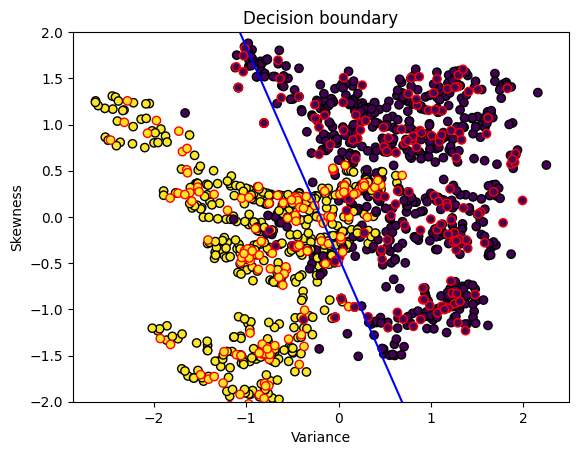

In [143]:
plt.scatter(X_train['variance'], X_train['skewness'], c=y_train, edgecolors='black') #plot the training data
plt.scatter(X_test['variance'], X_test['skewness'], c=y_test, edgecolors='red')  #plot the testing data 
plt.plot(x1_vals, x2_vals, color='blue') #plot the decision boundary
plt.ylim(-2, 2) #set the limits of the y axis
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.title('Decision boundary')
plt.show()

## Adaline Algorithm

In [138]:
total = len(X_train) #calculate the total number of training data
lr=0.0001 #set the learning rate
score=0 #initialize the score to 0
for i in range(1000):
    score=0
    for j in range(total):
        xP = X_train.iloc[j]  #select the jth row of the training data
        yP = 1 if y_train.iloc[j] == 1 else -1  #select the jth row of the training data and convert it to 1 or -1
        z = np.dot(w, xP) + b #calculate the dot product of the weights and the training data and add the bias to it
        error = yP - z #calculate the error 
        w += lr * error * xP #update the weights
        b += lr * error #update the bias
        ypred= 1 if(z >= 0) else -1 #calculate the predicted value of the training data
        if yP == ypred: #check if the predicted value is equal to the actual value
            score += 1
    if i % 100 == 0:
        print(f'Iteration {i}:w={w.values}, b={b}, score={score} out of {total}')

print(f'Final w={w.values}, b={b}')


Iteration 0:w=[-0.07753767 -0.04589403], b=[-0.01292848], score=976 out of 1097
Iteration 100:w=[-0.64545828 -0.28313332], b=[-0.12337272], score=980 out of 1097
Iteration 200:w=[-0.64551047 -0.28308277], b=[-0.12337746], score=980 out of 1097
Iteration 300:w=[-0.64551049 -0.28308276], b=[-0.12337746], score=980 out of 1097
Iteration 400:w=[-0.64551049 -0.28308276], b=[-0.12337746], score=980 out of 1097
Iteration 500:w=[-0.64551049 -0.28308276], b=[-0.12337746], score=980 out of 1097
Iteration 600:w=[-0.64551049 -0.28308276], b=[-0.12337746], score=980 out of 1097
Iteration 700:w=[-0.64551049 -0.28308276], b=[-0.12337746], score=980 out of 1097
Iteration 800:w=[-0.64551049 -0.28308276], b=[-0.12337746], score=980 out of 1097
Iteration 900:w=[-0.64551049 -0.28308276], b=[-0.12337746], score=980 out of 1097
Final w=[-0.64551049 -0.28308276], b=[-0.12337746]


In [165]:
y_pred = np.where(np.dot(X_test, w) + b >= 0, 1, 0) #predict the values of the testing data
correct_adaline = np.sum(y_pred == y_test) #calculate the number of correct predictions
print(f'Accuracy: {((correct_adaline / len(y_test))*100).round()}%') #calculate the accuracy of the model
print(f'score: {np.sum(y_pred == y_test)} Correct form {len(y_test)}') #print the score of the model

Accuracy: 84.0%
score: 231 Correct form 275


In [140]:
x1_min, x1_max = X_train['variance'].min(), X_train['variance'].max()  #find the minimum and maximum values of the variance column
x1_vals = np.linspace(x1_min, x1_max, 100) #create 100 equally spaced values between the minimum and maximum values of the variance column
x2_vals = -(w[0] * x1_vals + b)/ w[1]  #calculate the values of the skewness column using the weights and the bias

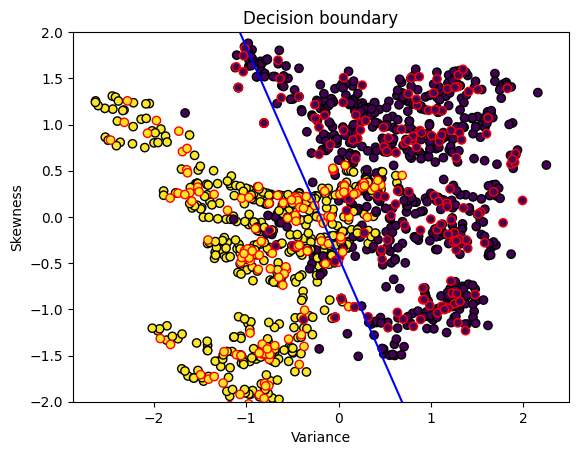

In [141]:
plt.scatter(X_train['variance'], X_train['skewness'], c=y_train, edgecolors='black') #plot the training data
plt.scatter(X_test['variance'], X_test['skewness'], c=y_test, edgecolors='red')  #plot the testing data
plt.plot(x1_vals, x2_vals, color='blue') #plot the decision boundary
plt.ylim(-2, 2) #set the limits of the y axis
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.title('Decision boundary')
plt.show()

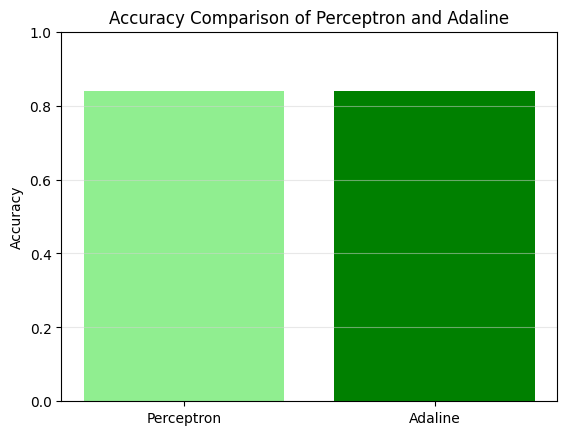

In [163]:
perceptron_acc = correct_perceptron / len(y_test) #calculate the accuracy of the perceptron model
adaline_acc = correct_adaline / len(y_test) #calculate the accuracy of the adaline model
data = [perceptron_acc, adaline_acc] #store the accuracy values in a list
labels = ['Perceptron', 'Adaline'] #store the names of the models in a list 
fig, ax = plt.subplots() #create a figure and axes
ax.bar(labels, data, color=['lightgreen', 'green']) #plot the bar graph
ax.set_title('Accuracy Comparison of Perceptron and Adaline') 
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5) #add a horizontal grid to the graph
plt.show()